<a href="https://colab.research.google.com/github/mmonch/Sidecar_Project/blob/main/notebooks/Sidecar_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://sit.academy/"><img src="https://drive.google.com/uc?id=1z0U84GYqhbWWpCenFajh8_8XFRGyOc3U" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h1> Notebook 1: Sidecar Data Exploration </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>SIT Academy, 2022</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Short description of the aim of the notebook</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#I'>Introduction </a> </li>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Part 1</a></li>
            <li> <a style="color:#303030" href='#P2'>Part 2</a></li>
            <li> <a style="color:#303030" href='#P3'>Part 3</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Keywords:</strong> data cleaning, NLP, ... list of keywords.
    </div>
</div>
</nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

Sources:
https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
https://loeb.nyc/blog/data-science-word-expander
https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
https://towardsdatascience.com/guide-to-fine-tuning-text-generation-models-gpt-2-gpt-neo-and-t5-dc5de6b3bc5e
https://www.machinecurve.com/index.php/2020/12/29/differences-between-autoregressive-autoencoding-and-sequence-to-sequence-models-in-machine-learning/

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

In [1]:
pip install nb_black

In [2]:
# auto reload packages and modules when they are modified
%load_ext autoreload
%autoreload 2
# draw matplotlib plots in line
%matplotlib inline
# enforce PEP 8 code on jupyter lab ...
#%load_ext lab_black
# ... or jupyter notebook
#%load_ext nb_black

# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade watermark blackcellmagic"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)

#%load_ext blackcellmagic

In [3]:
!pip install contractions

In [4]:
!pip install nltk>=3.2.1


### Packages

In [5]:
# General
import pandas as pd
import numpy as np

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata

### Custom classes and functions

### Global Parameters Setting

In [6]:
plt.style.use("seaborn")

### User-Dependent Variables

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
data = pd.read_csv("gdrive/My Drive/SIDECAR_P/Sidecar_Data_Sample.csv")

<a id='P1'></a>
## [Part one](#P0)

Here you could write a paragraph on the aim of part one. You could also have some nice figures



In [9]:
#%load_ext google.colab.data_table

data


,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
0,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,1,ID,Technical Id of the patient,The Primary Key (surrogate unique identifier) ...,NaN,NUMBER (38),Yes,Yes,Active,1
1,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,2,GNDR_CD,Gender Code,Code of GENDER CODE defined as: The gender of ...,"If Gender code = M then Male, F = Female, or U...",VARCHAR2 (80),No,No,Active,1
2,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,3,LIVG_ARNGMNT_CD,Living arrangement,Code of LIVING ARRANGEMENT CODE defined as: A ...,NaN,VARCHAR2 (80),No,No,Active,1
3,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,4,MRTL_STUS_CD,Marital status code,Code of MARITAL STATUS CODE defined as: Party'...,NaN,VARCHAR2 (80),No,No,Active,1
4,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,5,OCUPATN_CD,Occupation code,Code of OCCUPATION CODE defined as: The occupa...,NaN,VARCHAR2 (80),No,No,Active,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,I

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Domain_Id                 4133 non-null   int64 
 1   Domain_Name               4133 non-null   object
 2   Domain_Desc               4133 non-null   object
 3   Domain_Code               4133 non-null   object
 4   Domain_Status             4133 non-null   object
 5   Domain_Status_Code        4133 non-null   int64 
 6   Application_Id            4133 non-null   int64 
 7   Application_Name          4133 non-null   object
 8   Application_Code          4133 non-null   object
 9   Application_Desc          4133 non-null   object
 10  Application_Status        4133 non-null   object
 11  Application_Status_Code   4133 non-null   int64 
 12  Asset_Id                  4133 non-null   int64 
 13  Asset_Technical_Name      4133 non-null   object
 14  Asset_Business_Name     

In [11]:
data.describe()

,Domain_Id,Domain_Status_Code,Application_Id,Application_Status_Code,Asset_Id,Asset_Status_Code,Asset_Type_Id,Privacy_Level_Id,Attribute_Id,Attribute_Status_Code
count,4133.000000,4133.0,4133.000000,4133.0,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,7.288168,1.0,32.568836,1.0,217.097992,1.008226,1.189451,-0.331720,2173.253327,1.009436
std,3.175863,0.0,19.112937,0.0,129.265674,0.128020,0.391914,1.417479,1294.975998,0.136184
min,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
25%,7.000000,1.0,15.000000,1.0,109.000000,1.000000,1.000000,-1.000000,1039.000000,1.000000
50%,7.000000,1.0,25.000000,1.0,222.000000,1.000000,1.000000,-1.000000,2145.000000,1.000000
75%,7.000000,1.0,52.000000,1.0,320.000000,1.000000,1.000000,-1.000000,3195.000000,1.000000
max,19.000000,1.0,56.000000,1.0,428.000000,3.000000,2.000000,4.000000,4460.000000,3.000000


In [12]:
data.isnull().any()

Domain_Id                   False
Domain_Name                 False
Domain_Desc                 False
Domain_Code                 False
Domain_Status               False
Domain_Status_Code          False
Application_Id              False
Application_Name            False
Application_Code            False
Application_Desc            False
Application_Status          False
Application_Status_Code     False
Asset_Id                    False
Asset_Technical_Name        False
Asset_Business_Name         False
Asset_Business_Desc          True
Asset_Status                False
Asset_Status_Code           False
Asset_Server_Name           False
Asset_Database              False
Asset_Schema                False
Asset_Type_Id               False
Asset_Type_Name             False
Asset_Type_Desc             False
Privacy_Level_Id            False
Asset_Privacy_Level         False
Asset_Privacy_Desc          False
Attribute_Id                False
Attribute_Technical_Name    False
Attribute_Busi

In [13]:
is_na = data[data.isna().any(axis=1)]

In [14]:
len(is_na)

3792

In [15]:
is_na.tail()

,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4458,Property_IsDQ,Property IsDQ,Flag that indicates if the property is a data ...,NaN,bit,No,Yes,Active,1
4131,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4459,Property_DQ_Calculation,Property DQ Calculation,Data quality calculation of the custom property,NaN,varchar (50),No,Yes,Active,1
4132,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4460,Property_DQ_Output_Format,Property DQ Output Format,Data quality output format of the custom property,NaN,varchar (20),No,Yes,Active,1


In [16]:
np.sort(data["Asset_Id"].unique())

array([  1,   2,   3,   4,   5,   9,  10,  11,  13,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  31,  34,
        38,  40,  41,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 150, 151,
       152, 153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 20

In [17]:
# how many values per column, value_counts() per feature
# plot distributions barplot or histogramm
for col in data.columns:
  print (f"Column Name, Number of unique values: \n{col}, {data[col].nunique()}\nValue Counts: \n{data[col].value_counts()}\n\n----------------------")

Column Name, Number of unique values: 
Domain_Id, 8
Value Counts: 
7     2700
11     508
1      302
12     269
2      258
19      60
14      22
10      14
Name: Domain_Id, dtype: int64

----------------------
Column Name, Number of unique values: 
Domain_Name, 8
Value Counts: 
ICT                            2700
Clinical Research               508
Patient administrative          302
 Humanitarian Data Exchange     269
Biobank                         258
Master Data                      60
Insurance                        22
Infectious Diseases              14
Name: Domain_Name, dtype: int64

----------------------
Column Name, Number of unique values: 
Domain_Desc, 8
Value Counts: 
ICT department                                                                                                                                                                                                                                                                                                       

In [18]:
data["Attribute_Technical_Name"].value_counts()

ModifiedDate            73
SYS_LastModified        49
LastEditedBy            49
SYS_LastModifiedBy      46
ValidFrom               38
                        ..
cumulative_intensity     1
intensity_level          1
incompatibility          1
side_b_2nd               1
Property_IsDQ            1
Name: Attribute_Technical_Name, Length: 1998, dtype: int64

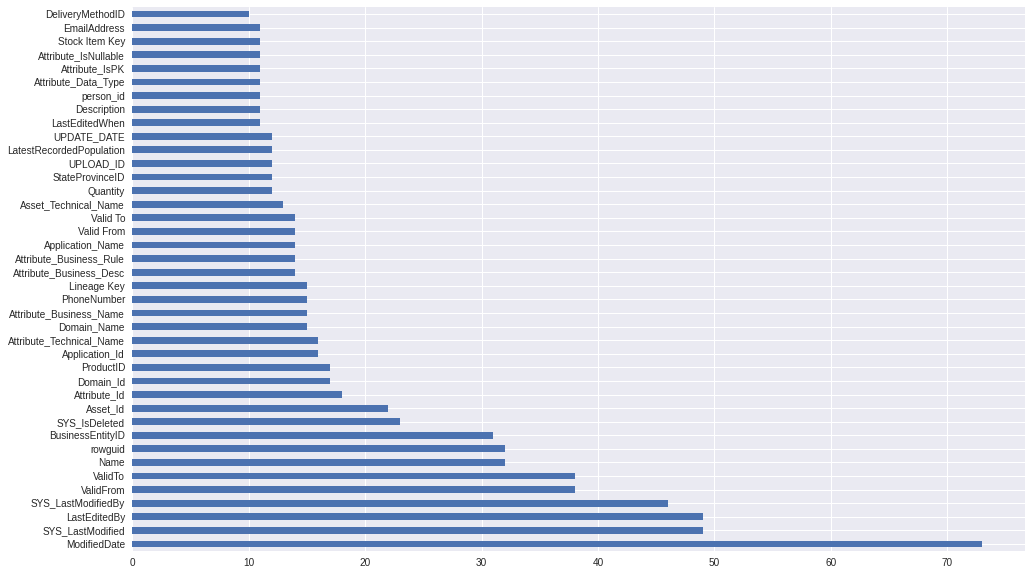

In [19]:
data["Attribute_Technical_Name"].value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

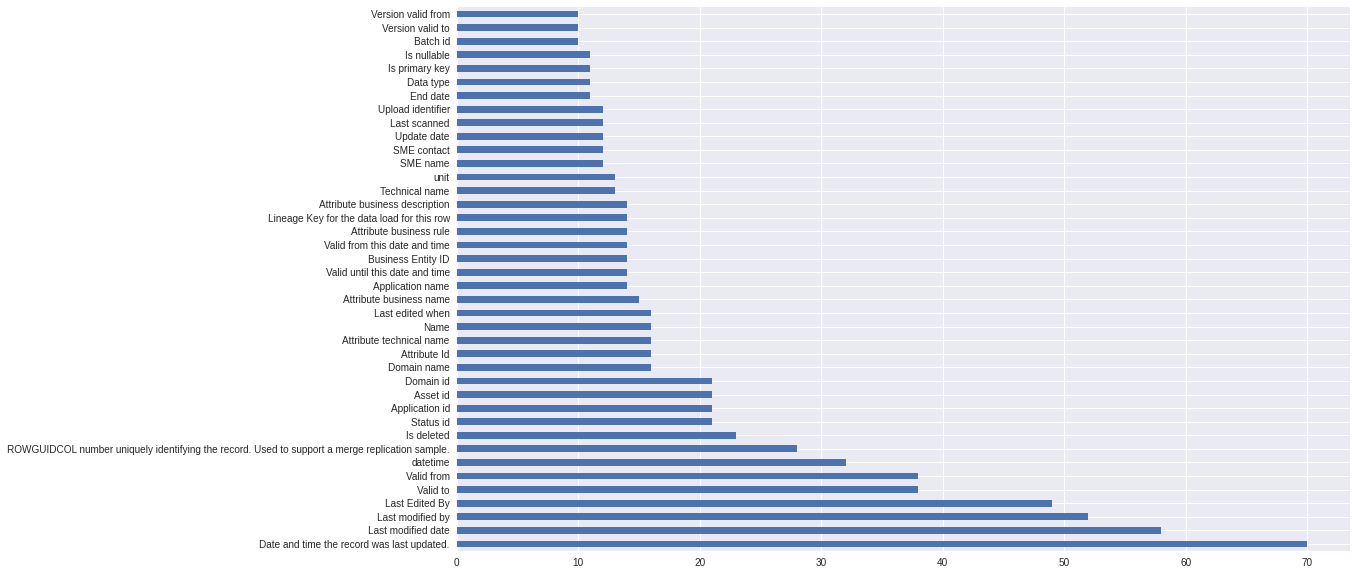

In [20]:
data["Attribute_Business_Name"].value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

In [21]:
data["Attribute_Technical_Name"].astype(str)

0                                 ID
1                            GNDR_CD
2                    LIVG_ARNGMNT_CD
3                       MRTL_STUS_CD
4                         OCUPATN_CD
                    ...             
4128    Config_AssetList_Data_Source
4129           Attribute_Sample_Data
4130                   Property_IsDQ
4131         Property_DQ_Calculation
4132       Property_DQ_Output_Format
Name: Attribute_Technical_Name, Length: 4133, dtype: object

### Exploring Basic Models

First we will try to generate the Business Name from the technical name, which should be a relatively straightforward problem. 

There are two basic approaches we can try. 

1. Similarity-based Model
2. Rule-based Model

Text preprocessing:
- try removing contractions (last step)
- strip whitespaces
- remove underscores
- evtl. remove numbers (if it makes sense, for some data sets that might be a terrible idea --> genetic data/loci information etc.)
- remove accentuation
- remove special characters
- evtl. remove punctuation
- is lemmatization possible?
- remove tabs (if there even are any)
- change everything to lowercase
- IDEA: Use probabilistic word expansion [source](https://loeb.nyc/blog/data-science-word-expander) (Word_expander) to expand abbreviated technical names? Symspell 


In [22]:
# preprocess and normalize Text

# in case text not english
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

# preprocessing
def pre_process_text(labels):
  norm_docs = []
  for string in tqdm.tqdm(labels):
    string = string.replace("_", " ")
    string = string.translate(string.maketrans("\n\t\r", "   "))
    string = remove_accented_chars(string) 
    # and inset a space where a number follows a letter et vice versa
    string = re.sub(r'(?<=\d)(?=[^\d\s])|(?<=[^\d\s])(?=\d)', ' ', string)
    # insert space where an uppercase letter follows a lowercase letter
    string = re.sub(r"(?<![A-Z\W])(?=[A-Z])", " ", string)
    string = contractions.fix(string)
    # where XXXX number to XXXX number replace - with to IN PROGRESS
    string = string.replace("-", " to ")
    # remove special characters or whitespaces
    string = re.sub(r"[^a-zA-Z0-9\s]", "", string, flags=re.I|re.A)
    string = string.lower()
    string = string.strip()
    string = string.split(" ")
    norm_docs.append(string)
  return norm_docs

In [23]:
list1 = ["PAF1234567","ABC123553", "hep3", "obsolete_3"]
pre_process_text(list1)

100%|██████████| 4/4 [00:00<00:00, 5208.70it/s]


[['paf', '1234567'], ['abc', '123553'], ['hep', '3'], ['obsolete', '3']]

In [24]:
data["Attribute_Technical_Name"]

0                                 ID
1                            GNDR_CD
2                    LIVG_ARNGMNT_CD
3                       MRTL_STUS_CD
4                         OCUPATN_CD
                    ...             
4128    Config_AssetList_Data_Source
4129           Attribute_Sample_Data
4130                   Property_IsDQ
4131         Property_DQ_Calculation
4132       Property_DQ_Output_Format
Name: Attribute_Technical_Name, Length: 4133, dtype: object

In [25]:
#paf = data[data['Attribute_Technical_Name'].str.startswith('P_AF')]
# data.Attribute_Technical_Name.str.startswith('Paf')
#data_no_paf = data[~data['Attribute_Technical_Name'].isin(['P_AF'])]
data_no_paf = data[data['Attribute_Technical_Name'].str.contains("P_AF")==False]

In [26]:
data_no_paf

,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
0,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,1,ID,Technical Id of the patient,The Primary Key (surrogate unique identifier) ...,NaN,NUMBER (38),Yes,Yes,Active,1
1,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,2,GNDR_CD,Gender Code,Code of GENDER CODE defined as: The gender of ...,"If Gender code = M then Male, F = Female, or U...",VARCHAR2 (80),No,No,Active,1
2,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,3,LIVG_ARNGMNT_CD,Living arrangement,Code of LIVING ARRANGEMENT CODE defined as: A ...,NaN,VARCHAR2 (80),No,No,Active,1
3,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,4,MRTL_STUS_CD,Marital status code,Code of MARITAL STATUS CODE defined as: Party'...,NaN,VARCHAR2 (80),No,No,Active,1
4,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,5,OCUPATN_CD,Occupation code,Code of OCCUPATION CODE defined as: The occupa...,NaN,VARCHAR2 (80),No,No,Active,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,I

In [27]:
data["prep_tech_data"] = pre_process_text(data["Attribute_Technical_Name"])

100%|██████████| 4133/4133 [00:00<00:00, 40747.91it/s]


In [28]:
data["prep_business_data"]= pre_process_text(data["Attribute_Technical_Name"])

100%|██████████| 4133/4133 [00:00<00:00, 30972.44it/s]


100%|██████████| 4133/4133 [00:00<00:00, 27063.11it/s]


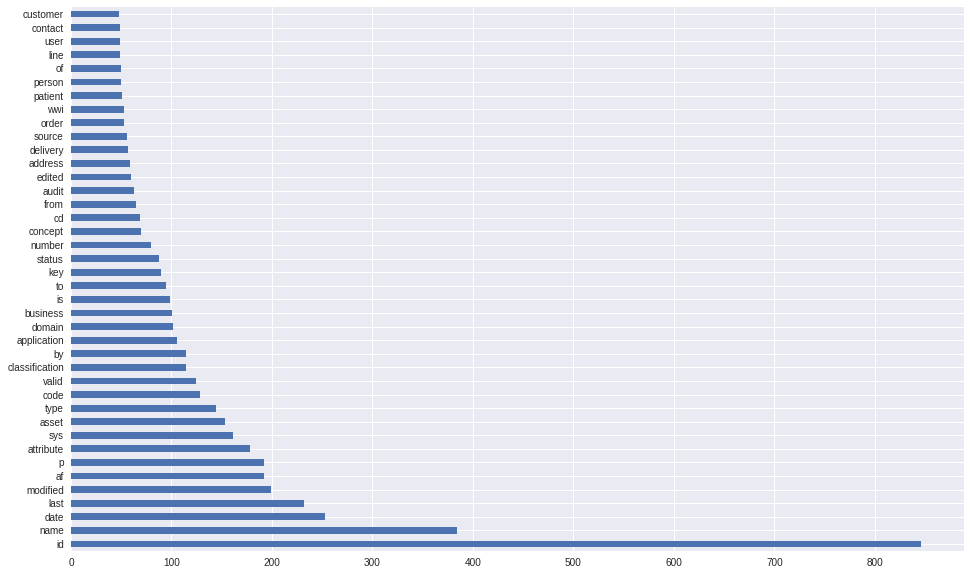

In [29]:
prep_tech_data = pre_process_text(data["Attribute_Technical_Name"])
tech_word_list = sum(prep_tech_data, [])
tech_word_series = pd.Series(tech_word_list)
tech_word_series.value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

100%|██████████| 3941/3941 [00:00<00:00, 22250.84it/s]


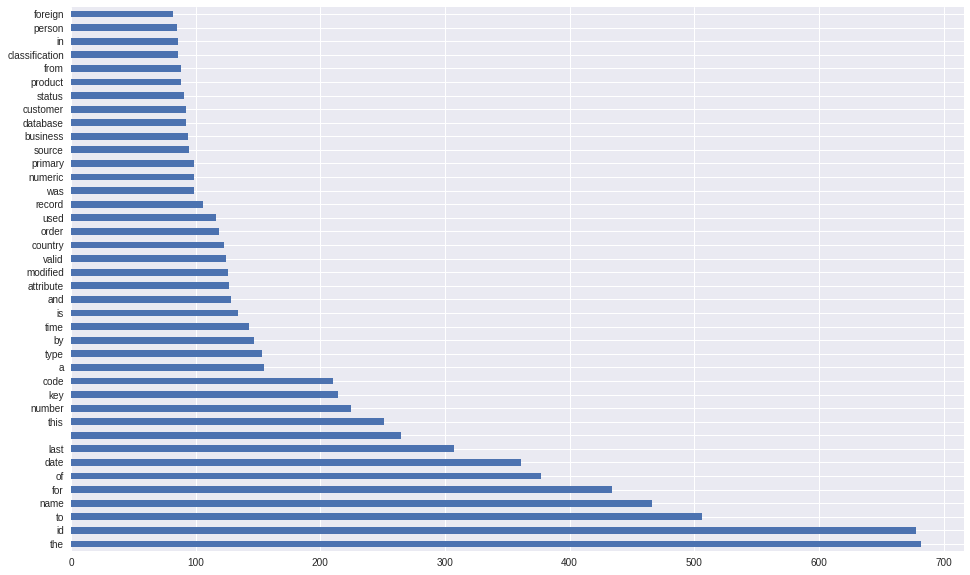

In [30]:
prep_business_data= pre_process_text(data_no_paf["Attribute_Business_Name"])
business_word_list = sum(prep_business_data, [])
business_word_series = pd.Series(business_word_list)
business_word_series.value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

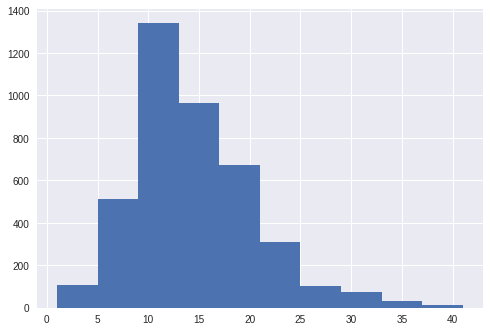

In [31]:
# histogram of string length in characters
data['Attribute_Technical_Name'].str.len().hist()
plt.show()

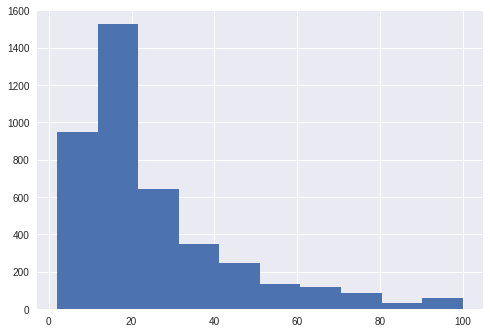

In [32]:
# as above in characters
data['Attribute_Business_Name'].str.len().hist()
plt.show()

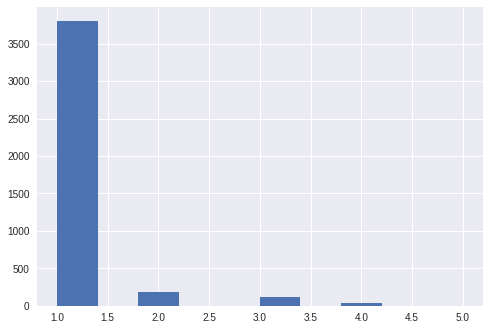

In [33]:
# histogram of string length in words
data.Attribute_Technical_Name.str.split().\
    map(lambda x: len(x)).\
    hist()
plt.show()

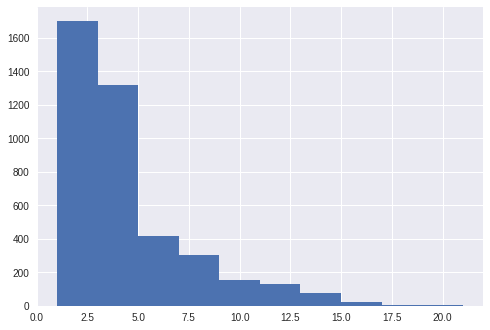

In [34]:
# histogram of string length in words
data.Attribute_Business_Name.str.split().\
    map(lambda x: len(x)).\
    hist()
plt.show()

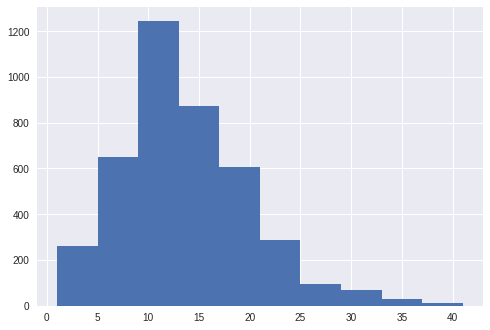

In [35]:
# average word length
data['Attribute_Technical_Name'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()

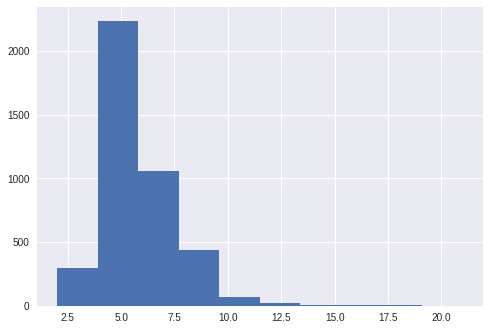

In [36]:
# average word length
data['Attribute_Business_Name'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
corpus=[]
new= data_no_paf['Attribute_Business_Name'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [39]:
# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)


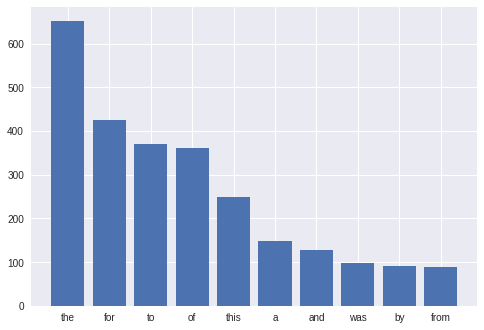

In [40]:

plot_top_stopwords_barchart(data_no_paf['Attribute_Business_Name'])

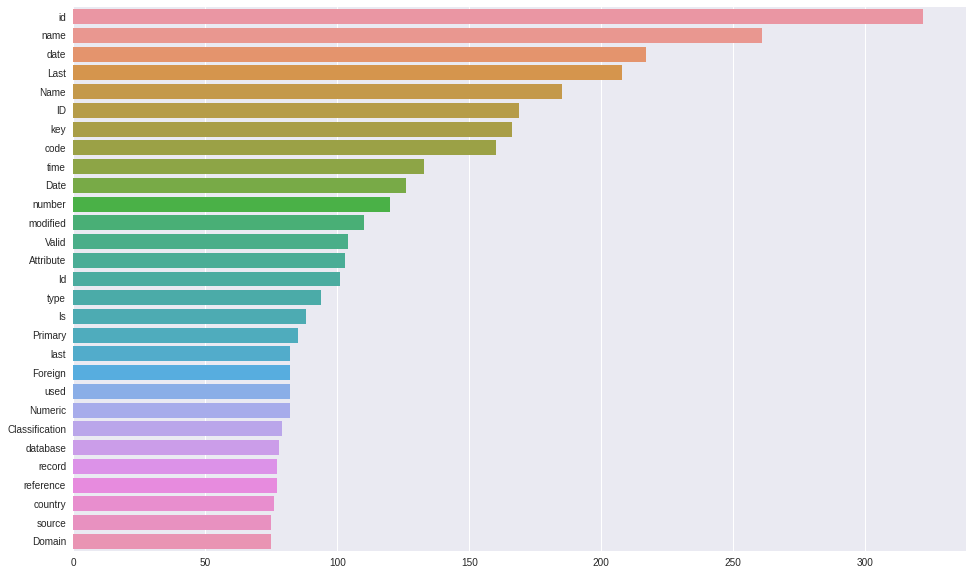

In [41]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

In [42]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [43]:
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

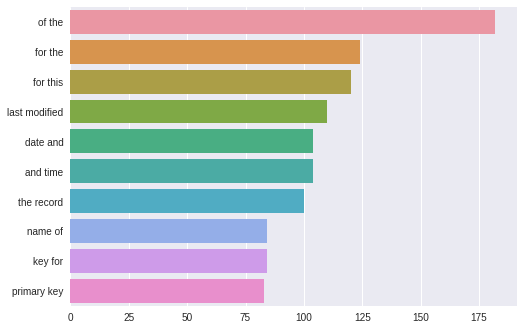

In [44]:
top_n_bigrams_attribute_business_name = get_top_ngrams(data_no_paf["Attribute_Business_Name"],2)[:40]
x,y=map(list,zip(*top_n_bigrams_attribute_business_name)) 
sns.barplot(x=y,y=x)
plt.show()

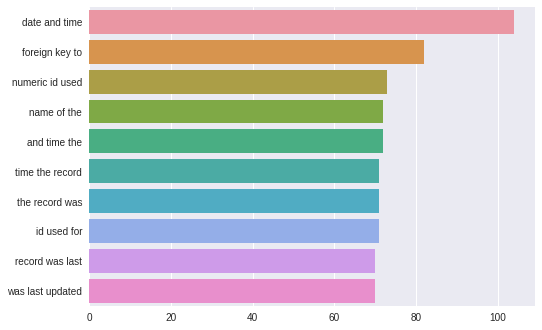

In [45]:
top_tri_grams_attribute_business_name=get_top_ngrams(data_no_paf['Attribute_Business_Name'],n=3)
x,y=map(list,zip(*top_tri_grams_attribute_business_name))
sns.barplot(x=y,y=x)
plt.show()

In [46]:
# let's try topic modelling with pycaret instead
# https://towardsdatascience.com/topic-modeling-on-pycaret-2ce0c65ba3ff
!pip install --upgrade pycaret

  Using cached importlib_metadata-4.10.1-py3-none-any.whl (17 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.1.3
    Uninstalling importlib-metadata-2.1.3:
      Successfully uninstalled importlib-metadata-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
watermark 2.3.0 requires importlib-metadata<3.0; python_version < "3.8", but you have importlib-metadata 4.10.1 which is incompatible.


In [ ]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora


In [48]:
from pycaret.nlp import *
import scipy.linalg

In [49]:
# initialize the setup
nlp = setup(data = data, target = "Attribute_Business_Name", session_id = 42)

Description,Value
session_id,42
Documents,4133
Vocab Size,890
Custom Stopwords,False


In [50]:
lda = create_model('lda', num_topics = 10, multi_core = True)

In [57]:
df_lda = assign_model(lda)

In [ ]:
df_lda.head()

In [64]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


 PyCarets offers a variety of plots. The type of graph generated will depend on the plot parameter. Here is the list of currently available visualizations:
- ‘frequency’: Word Token Frequency (default)
- ‘distribution’: Word Distribution Plot
- ‘bigram’: Bigram Frequency Plot
- ‘trigram’: Trigram Frequency Plot
- ‘sentiment’: Sentiment Polarity Plot
- ‘pos’: Part of Speech Frequency
- ‘tsne’: t-SNE (3d) Dimension Plot
- ‘topic_model’ : Topic Model (pyLDAvis)
- ‘topic_distribution’ : Topic Infer Distribution
- ‘wordcloud’: Word cloud
- ‘umap’: UMAP Dimensionality Plot

In [67]:
plot_model(lda, plot="topic_model")
plot_model(lda, plot="topic_distribution")

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.431567 -0.198267       1        1  12.758424
3     -0.027398  0.207406       2        1  12.647830
6     -0.271366  0.359634       3        1  11.395131
7      0.170809 -0.125230       4        1  10.241915
9      0.402430 -0.147676       5        1   9.681362
5      0.372742  0.199894       6        1   9.652274
2      0.100510  0.362373       7        1   8.834849
8      0.082300 -0.397232       8        1   8.546776
1     -0.276253  0.022205       9        1   8.535810
0     -0.122207 -0.283107      10        1   7.705629, topic_info=            Term        Freq       Total Category  logprob  loglift
13          name  434.000000  434.000000  Default  30.0000  30.0000
1          would  511.000000  511.000000  Default  29.0000  29.0000
14          last  303.000000  303.000000  Default  28.0000  28.0000
20          date  272.000000  272.000000  Default  27.0000  27.0000
47        number  169.000000  169.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
739   applicable    7.590631   13.208787  Topic10  -4.5718   2.0093
360         file    4.411315    7.458163  Topic10  -5.1145   2.0381
724      package    8.355401   24.522873  Topic10  -4.4758   1.4865
472      product   15.086099   71.921455  Topic10  -3.8849   1.0014
247  young_feede    2.899595    4.945320  Topic10  -5.5341   2.0293

[411 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
560       5  0.954228      account
667       1  0.765028       actual
531       1  0.483829   additional
21        5  0.988336      address
511       5  0.682084    addressid
...     ...       ...          ...
1         3  0.824695        would
1         9  0.001954        would
233       2  0.958443         year
247       7  0.202211  young_feede
247      10  0.606634  young_feede

[426 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 7, 8, 10, 6, 3, 9, 2, 1])

In [66]:
plot_model(lda, plot='frequency', topic_num = 'Topic 5')


broken approach following

In [51]:
import nltk
from nltk import PorterStemmer, WordNetLemmatizer, word_tokenize 
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for label in data['Attribute_Business_Name']:
        words=[w for w in word_tokenize(label) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
!pip install gensim

In [53]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [54]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()


[(0,
  '0.058*"Last" + 0.035*"modified" + 0.034*"key" + 0.031*"time" + 0.028*"record" + 0.028*"date" + 0.021*"Date" + 0.021*"Primary" + 0.020*"last" + 0.018*"Domain"'),
 (1,
  '0.035*"type" + 0.033*"name" + 0.020*"identifier" + 0.019*"order" + 0.016*"Business" + 0.016*"Asset" + 0.015*"Data" + 0.014*"Version" + 0.014*"customer" + 0.013*"Search"'),
 (2,
  '0.039*"date" + 0.030*"Valid" + 0.025*"Name" + 0.024*"used" + 0.023*"Numeric" + 0.023*"reference" + 0.022*"database" + 0.022*"item" + 0.021*"within" + 0.018*"source"'),
 (3,
  '0.052*"name" + 0.036*"code" + 0.035*"number" + 0.033*"Attribute" + 0.025*"country" + 0.017*"key" + 0.017*"description" + 0.016*"business" + 0.012*"Number" + 0.011*"Name"')]

In [55]:
!pip install pyldavis

In [56]:
# Code Snippet for Creating LDA visualization

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for label in text:
            words=[w for w in word_tokenize(label) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

ModuleNotFoundError: ignored

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

In [ ]:
pip install git+https://github.com/NBCLab/abbr

In [ ]:
import abbr

In [ ]:
from abbr import findall, expandall


In [ ]:
#prep_data = " ".join(prep_data)
abbr_data= []
for string in prep_data:
  map_object = map(expandall, string)
  new_list = list(map_object)
  abbr_data.append(new_list) 


In [ ]:
# abbr did nothing: BOO!
list_difference = [item for item in abbr_data if item not in prep_data]
list_difference

In [ ]:
# install autocorrect
!pip install autocorrect

In [ ]:
from autocorrect import Speller
# autocorrect will run faster as a numpy array

In [ ]:
def autocorrect(doc):
  autocorr_doc = []
  spell = Speller() #spell(data)
  # use lambda function and list comprehension to loop over strings
  autocorr_text = [spell(x) for x in doc]
  autocorr_doc.append(autocorr_text)
  return autocorr_text #autocorr_doc

In [ ]:
autocorrect(prep_data)


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

<div style="background:#EEEDF5;color:#303030"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    This Markdown cell is a template to write extended comments. e.g. explain the approach taken, or concepts behind algorithm chosen. Aim at having 2 lines at least. Anything smaller can be directly integrated in the code, or gathered together with other comments to form a bigger paragraph. Since this block is within a div element, you need to use html formatting syntax, not markdown
</div>

<div style="background:#EEEDF5;border:0.1cm solid #FDB100;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#FDB100">Title:</b> 
        This is a an example yellow box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        This is an example Blue Box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #EF475B;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#EF475B">Warning:</b> 
        This is an example red box
    </div>
</div>

<a id='P2' name="P2"></a>
## [Part 2 title here](#P0)

<a id='P3' name="P3"></a>
## [Part 3 title here](#P0)

<a id='CL'></a>
## [Conclusion](#P0)

This is a pre-written conclusion in which we have nice figures.

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>